<a href="https://colab.research.google.com/github/Sahil-Chhabra-09/NLP-with-Classification-and-Vector-Spaces/blob/main/NLP_with_Classification_and_Vector_Spaces.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NLP with Classification and Vector Spaces
start: 4 apr

* distinguish texts between positive sentiments and negative sentiments using logistic regression and naive bayes classifier
* representing words, queries and documents as numbers in vectors
* locality sensitive hashing for efficient searching

## Week 1

### Theory

Using logistic regression to build a classifier for sentiments
1. Text representation
  * build vocabulary(collection of all unique words)
  * represent each text as [1,1,0,0,1,....] where 1=> word present in text, and 0 denotes absence -> sparse representations, disadvantage: (no. of features = size of vocabulary)
  * map each word in vocabulary to it's corresponding frequency of negative tweet and positive tweet
  * now, instead of sparse representation, we can represent tweet as Xm{Features of tweet m} = [1{bias}, sum(freqs(w,1)){sum of pos. frequencies}, sum(freqs(w,0)){sum of neg. frequencies}]
  eg: tweet -> I am sad, I am not learning NLP => Xm = [1,8,11]
2. Preprocessing words in vocabulary
  * stopwords: words that don't add significant meaning
  * punctuation: in some context, punctuations are important
  * stemming : transforming any word to its base stem
  * lowercasing
3. Building feature matrix:
  * Build frequencies dictionary
  * Initialize matrix X {np.zeros((m,3))}
  * process tweet
  * extract features
4. Feeding the feature matrix to our logistic regression classifier
5. Logistic Regression:
  * probability = 1/1+e^ypred
  * threshold = 0.5
  * xi = [1, 3476, 245], theta = [0.00003, 0.00150, -0.00120]
  * xi*theta = ypred

### setup

In [ ]:
# NLTK(Natural Language Toolkit) -> contains modules for collecting, handling and processing data
import nltk
from nltk.corpus import twitter_samples  #sample twitter dataset from nltk
import matplotlib.pyplot as plt
import random

In [ ]:
nltk.download('twitter_samples')

[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Unzipping corpora/twitter_samples.zip.


True

In [ ]:
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

In [ ]:
print('Number of positive tweets: ', len(all_positive_tweets))
print('Number of negative tweets: ', len(all_negative_tweets))

print('\nThe type of all_positive_tweets is: ', type(all_positive_tweets))
print('The type of a tweet entry is: ', type(all_negative_tweets[0]))

Number of positive tweets:  5000
Number of negative tweets:  5000

The type of all_positive_tweets is:  <class 'list'>
The type of a tweet entry is:  <class 'str'>


In [ ]:
# print positive in green
print('\033[92m' + all_positive_tweets[random.randint(0,5000)])

# print negative in red
print('\033[91m' + all_negative_tweets[random.randint(0,5000)])

@WickedPill @jimmyurine you're welcome :)
Stock up sa for 1 hour. :(


### preprocessing

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer

In [ ]:
tweet = all_positive_tweets[2277]
print(tweet)

print('\033[92m' + tweet)
print('\033[94m')

# remove old style retweet text "RT"
tweet2 = re.sub(r'^RT[\s]+', '', tweet)

# remove hyperlinks
tweet2 = re.sub(r'https?://[^\s\n\r]+', '', tweet2)

# remove hashtags
# only removing the hash # sign from the word
tweet2 = re.sub(r'#', '', tweet2)

print(tweet2)

My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i
My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i

My beautiful sunflowers on a sunny Friday morning off :) sunflowers favourites happy Friday off… 


In [ ]:
print()
print('\033[92m' + tweet2)
print('\033[94m')

# instantiate tokenizer class
tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)

# tokenize tweets
tweet_tokens = tokenizer.tokenize(tweet2)

print()
print('Tokenized string:')
print(tweet_tokens)


My beautiful sunflowers on a sunny Friday morning off :) sunflowers favourites happy Friday off… 


Tokenized string:
['my', 'beautiful', 'sunflowers', 'on', 'a', 'sunny', 'friday', 'morning', 'off', ':)', 'sunflowers', 'favourites', 'happy', 'friday', 'off', '…']


In [ ]:
#Import the english stop words list from NLTK
stopwords_english = stopwords.words('english') 

print('Stop words\n')
print(stopwords_english)

print('\nPunctuation\n')
print(string.punctuation)

Stop words

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so

In [ ]:
print()
print('\033[92m')
print(tweet_tokens)
print('\033[94m')

tweets_clean = []

for word in tweet_tokens: # Go through every word in your tokens list
    if (word not in stopwords_english and  # remove stopwords
        word not in string.punctuation):  # remove punctuation
        tweets_clean.append(word)

print('removed stop words and punctuation:')
print(tweets_clean)



['my', 'beautiful', 'sunflowers', 'on', 'a', 'sunny', 'friday', 'morning', 'off', ':)', 'sunflowers', 'favourites', 'happy', 'friday', 'off', '…']

removed stop words and punctuation:
['beautiful', 'sunflowers', 'sunny', 'friday', 'morning', ':)', 'sunflowers', 'favourites', 'happy', 'friday', '…']


In [ ]:
print()
print('\033[92m')
print(tweets_clean)
print('\033[94m')

# Instantiate stemming class
stemmer = PorterStemmer() 

# Create an empty list to store the stems
tweets_stem = [] 

for word in tweets_clean:
    stem_word = stemmer.stem(word)  # stemming word
    tweets_stem.append(stem_word)  # append to the list

print('stemmed words:')
print(tweets_stem)



['beautiful', 'sunflowers', 'sunny', 'friday', 'morning', ':)', 'sunflowers', 'favourites', 'happy', 'friday', '…']

stemmed words:
['beauti', 'sunflow', 'sunni', 'friday', 'morn', ':)', 'sunflow', 'favourit', 'happi', 'friday', '…']


In [ ]:
def process_tweet(tweet):
    """Process tweet function.
    Input:
        tweet: a string containing a tweet
    Output:
        tweets_clean: a list of words containing the processed tweet

    """
    stemmer = PorterStemmer()
    stopwords_english = stopwords.words('english')
    # remove stock market tickers like $GE
    tweet = re.sub(r'\$\w*', '', tweet)
    # remove old style retweet text "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    # remove hyperlinks    
    tweet = re.sub(r'https?://[^\s\n\r]+', '', tweet)
    # remove hashtags
    # only removing the hash # sign from the word
    tweet = re.sub(r'#', '', tweet)
    # tokenize tweets
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet)

    tweets_clean = []
    for word in tweet_tokens:
        if (word not in stopwords_english and  # remove stopwords
                word not in string.punctuation):  # remove punctuation
            # tweets_clean.append(word)
            stem_word = stemmer.stem(word)  # stemming word
            tweets_clean.append(stem_word)

    return tweets_clean

In [ ]:
tweet = all_positive_tweets[227]
print(tweet)

# call the imported function
tweets_stem = process_tweet(tweet); # Preprocess a given tweet

print('preprocessed tweet:')
print(tweets_stem) # Print the result

@coffeebreak22 @LauRenArren @drparkave @JWKanyuira1969 @dheracing @RhoaChri @BarbaraBathurst @1cryingeye @willisteam :) ☕☕☕ Thank you Rita!
preprocessed tweet:
[':)', '☕', '☕', '☕', 'thank', 'rita']


### Building feature matrix

In [ ]:
tweets = all_positive_tweets + all_negative_tweets
print("Number of tweets: ", len(tweets))

Number of tweets:  10000


In [ ]:
import numpy as np
labels = np.append(np.ones((len(all_positive_tweets))), np.zeros((len(all_negative_tweets))))

In [ ]:
def build_freqs(tweets, ys):
    """Build frequencies.
    Input:
        tweets: a list of tweets
        ys: an m x 1 array with the sentiment label of each tweet
            (either 0 or 1)
    Output:
        freqs: a dictionary mapping each (word, sentiment) pair to its
        frequency
    """
    # Convert np array to list since zip needs an iterable.
    # The squeeze is necessary or the list ends up with one element.
    # Also note that this is just a NOP if ys is already a list.
    yslist = np.squeeze(ys).tolist()

    # Start with an empty dictionary and populate it by looping over all tweets
    # and over all processed words in each tweet.
    freqs = {}
    for y, tweet in zip(yslist, tweets):
        for word in process_tweet(tweet):   # preprocessing tweet
            pair = (word, y)
            if pair in freqs:
                freqs[pair] += 1
            else:
                freqs[pair] = 1    
    return freqs

each key is a 2-element tuple containing a (word, y) pair. The word is an element in a processed tweet while y is an integer representing the corpus: 1 for the positive tweets and 0 for the negative tweets. The value associated with this key is the number of times that word appears in the specified corpus. For example:

"followfriday" appears 25 times in the positive tweets

('followfriday', 1.0): 25

"shame" appears 19 times in the negative tweets

('shame', 0.0): 19 

In [ ]:
freqs = build_freqs(tweets, labels)

In [ ]:
freqs

{('followfriday', 1.0): 25,
 ('top', 1.0): 32,
 ('engag', 1.0): 7,
 ('member', 1.0): 16,
 ('commun', 1.0): 33,
 ('week', 1.0): 83,
 (':)', 1.0): 3691,
 ('hey', 1.0): 77,
 ('jame', 1.0): 7,
 ('odd', 1.0): 2,
 (':/', 1.0): 5,
 ('pleas', 1.0): 99,
 ('call', 1.0): 37,
 ('contact', 1.0): 7,
 ('centr', 1.0): 2,
 ('02392441234', 1.0): 1,
 ('abl', 1.0): 8,
 ('assist', 1.0): 1,
 ('mani', 1.0): 33,
 ('thank', 1.0): 643,
 ('listen', 1.0): 17,
 ('last', 1.0): 47,
 ('night', 1.0): 68,
 ('bleed', 1.0): 2,
 ('amaz', 1.0): 51,
 ('track', 1.0): 5,
 ('scotland', 1.0): 2,
 ('congrat', 1.0): 21,
 ('yeaaah', 1.0): 1,
 ('yipppi', 1.0): 1,
 ('accnt', 1.0): 2,
 ('verifi', 1.0): 2,
 ('rqst', 1.0): 1,
 ('succeed', 1.0): 1,
 ('got', 1.0): 69,
 ('blue', 1.0): 9,
 ('tick', 1.0): 1,
 ('mark', 1.0): 1,
 ('fb', 1.0): 6,
 ('profil', 1.0): 2,
 ('15', 1.0): 5,
 ('day', 1.0): 246,
 ('one', 1.0): 131,
 ('irresist', 1.0): 2,
 ('flipkartfashionfriday', 1.0): 17,
 ('like', 1.0): 233,
 ('keep', 1.0): 68,
 ('love', 1.0): 401,


In [ ]:
# select some words to appear in the report. we will assume that each word is unique (i.e. no duplicates)
keys = ['happi', 'merri', 'nice', 'good', 'bad', 'sad', 'mad', 'best', 'pretti',
        '❤', ':)', ':(', '😒', '😬', '😄', '😍', '♛',
        'song', 'idea', 'power', 'play', 'magnific']

# list representing our table of word counts.
# each element consist of a sublist with this pattern: [<word>, <positive_count>, <negative_count>]
data = []

# loop through our selected words
for word in keys:
    
    # initialize positive and negative counts
    pos = 0
    neg = 0
    
    # retrieve number of positive counts
    if (word, 1) in freqs:
        pos = freqs[(word, 1)]
        
    # retrieve number of negative counts
    if (word, 0) in freqs:
        neg = freqs[(word, 0)]
        
    # append the word counts to the table
    data.append([word, pos, neg])
    
data

[['happi', 212, 25],
 ['merri', 1, 0],
 ['nice', 99, 19],
 ['good', 238, 101],
 ['bad', 18, 73],
 ['sad', 5, 123],
 ['mad', 4, 11],
 ['best', 65, 22],
 ['pretti', 20, 15],
 ['❤', 29, 21],
 [':)', 3691, 2],
 [':(', 1, 4584],
 ['😒', 2, 3],
 ['😬', 0, 2],
 ['😄', 5, 1],
 ['😍', 5, 1],
 ['♛', 0, 210],
 ['song', 22, 27],
 ['idea', 27, 10],
 ['power', 7, 6],
 ['play', 46, 48],
 ['magnific', 2, 0]]

using a scatter plot to inspect this table visually. Instead of plotting the raw counts, we will plot it in the logarithmic scale to take into account the wide discrepancies between the raw counts (e.g. :) has 3691 counts in the positive while only 2 in the negative). The red line marks the boundary between positive and negative areas. Words close to the red line can be classified as neutral.

/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128556 (\N{GRIMACING FACE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


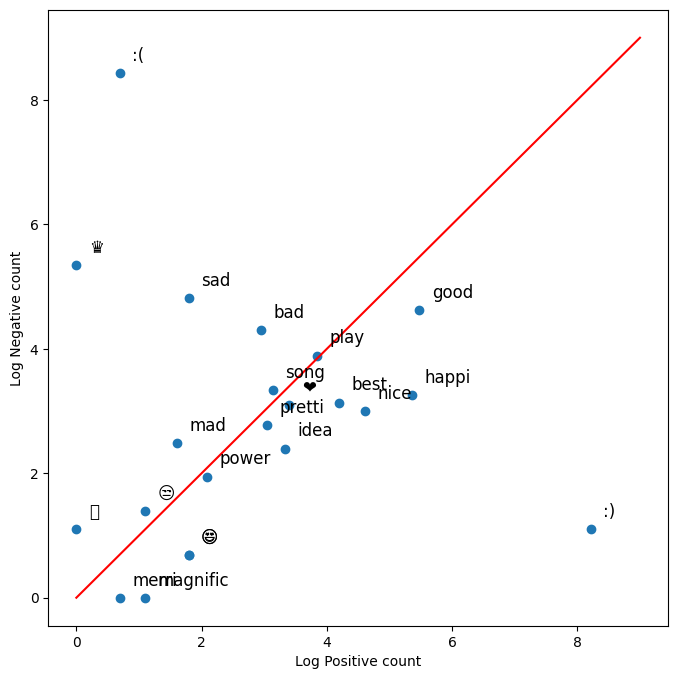

In [ ]:
fig, ax = plt.subplots(figsize = (8, 8))

# convert positive raw counts to logarithmic scale. we add 1 to avoid log(0)
x = np.log([x[1] + 1 for x in data])  

# do the same for the negative counts
y = np.log([x[2] + 1 for x in data]) 

# Plot a dot for each pair of words
ax.scatter(x, y)  

# assign axis labels
plt.xlabel("Log Positive count")
plt.ylabel("Log Negative count")

# Add the word as the label at the same position as you added the points just before
for i in range(0, len(data)):
    ax.annotate(data[i][0], (x[i]+0.2, y[i]+0.2), fontsize=12)

ax.plot([0, 9], [0, 9], color = 'red') # Plot the red line that divides the 2 areas.
plt.show()

### Creating the dataframe:
needed for logistic regression model.

In [ ]:
import pandas as pd
df = pd.DataFrame(columns = ['bias', 'positive', 'negative', 'sentiment'])

for tweet in tweets:
  lst = [1.0]
  pos = 0
  neg = 0
  for word in process_tweet(tweet):
    if(word,1) in freqs:
      pos = pos + freqs[(word,1)]
    if(word,0) in freqs:
      neg = neg + freqs[(word,0)]
  lst.append(pos)
  lst.append(neg)
  if pos>neg:
    lst.append(1.0)
  else:
    lst.append(0.0)
  df.loc[len(df.index)] = lst

In [ ]:
df.head()

,bias,positive,negative,sentiment
0,1.0,3887.0,72.0,1.0
1,1.0,4613.0,518.0,1.0
2,1.0,3883.0,161.0,1.0
3,1.0,3712.0,4.0,1.0
4,1.0,4038.0,281.0,1.0


In [ ]:
df.shape

(10000, 4)

In [ ]:
X = df[['bias', 'positive', 'negative']].values
Y = df['sentiment'].values

print(X.shape)
print(X)

(10000, 3)
[[1.000e+00 3.887e+03 7.200e+01]
 [1.000e+00 4.613e+03 5.180e+02]
 [1.000e+00 3.883e+03 1.610e+02]
 ...
 [1.000e+00 3.400e+01 4.653e+03]
 [1.000e+00 1.000e+01 4.598e+03]
 [1.000e+00 1.160e+02 5.900e+02]]


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.25, random_state = 0)

### Training logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

model = LogisticRegression(random_state = 0).fit(x_train,y_train)
score = model.score(x_test, y_test)
print("Score of model: ")
print(score)

Score of model: 
1.0


In [ ]:
y_actual = pd.Series(y_test, name='Actual')
y_predicted = pd.Series(model.predict(x_test), name='Predicted')
print("Confusion matrix: ")
pd.crosstab(y_actual,y_predicted)

Confusion matrix: 


Predicted,0.0,1.0
Actual,,
0.0,1238,0
1.0,0,1262


In [ ]:
# Extracting model coefficients
theta = model.coef_
theta = np.squeeze(theta)   # flattening the data

In [ ]:
theta

array([ 3.41512604e-04,  1.04782730e+00, -1.05097173e+00])

In [ ]:
theta[1]

1.0478273014310968

If we ignore the bias term, we can plot each tweet in a cartesian plane

Text(0, 0.5, 'Negative')

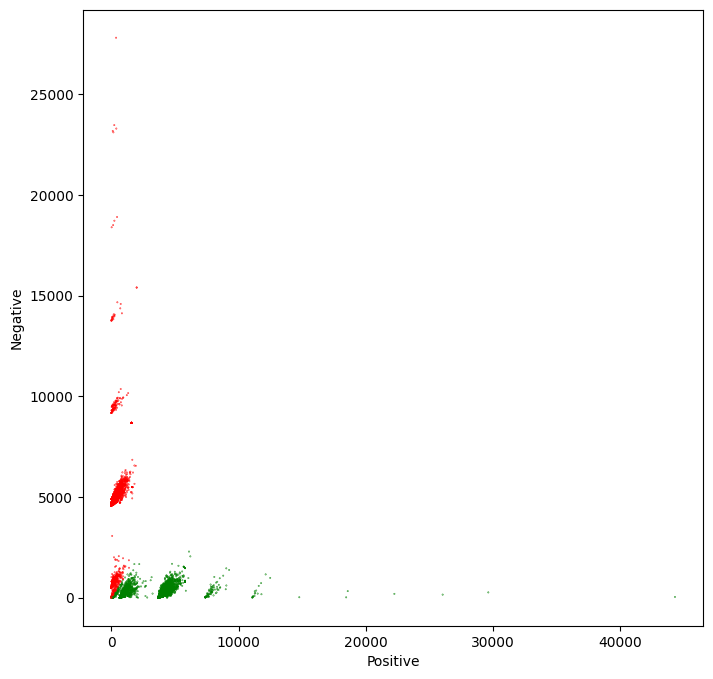

In [ ]:
fig, ax = plt.subplots(figsize = (8, 8))

colors = ['red', 'green']

# Color based on the sentiment Y
ax.scatter(X[:,1], X[:,2], c=[colors[int(k)] for k in Y], s = 0.1)  # Plot a dot for each pair of words
plt.xlabel("Positive")
plt.ylabel("Negative")

We will draw a gray line to show the cutoff between the positive and negative regions. In other words, the gray line marks the line where $$ z = \theta * x = 0.$$
To draw this line, we have to solve the above equation in terms of one of the independent variables.

$$ z = \theta * x = 0$$
$$ x = [1, pos, neg] $$
$$ z(\theta, x) = \theta_0+ \theta_1 * pos + \theta_2 * neg = 0 $$
$$ neg = (-\theta_0 - \theta_1 * pos) / \theta_2 $$

The red and green lines that point in the direction of the corresponding sentiment are calculated using a perpendicular line to the separation line calculated in the previous equations (neg function). It must point in the same direction as the derivative of the Logit function, but the magnitude may differ. It is only for a visual representation of the model. 

$$direction = pos * \theta_2 / \theta_1$$

In [ ]:
# Equation for the separation plane
# It give a value in the negative axe as a function of a positive value
# f(pos, neg, W) = w0 + w1 * pos + w2 * neg = 0
# s(pos, W) = (-w0 - w1 * pos) / w2
def neg(theta, pos):
    return (-theta[0] - pos * theta[1]) / theta[2]

# Equation for the direction of the sentiments change
# We don't care about the magnitude of the change. We are only interested 
# in the direction. So this direction is just a perpendicular function to the 
# separation plane
# df(pos, W) = pos * w2 / w1
def direction(theta, pos):
    return    pos * theta[2] / theta[1]

In [ ]:
maxpos = np.max(X[:,1])

In [ ]:
maxpos

44300.0

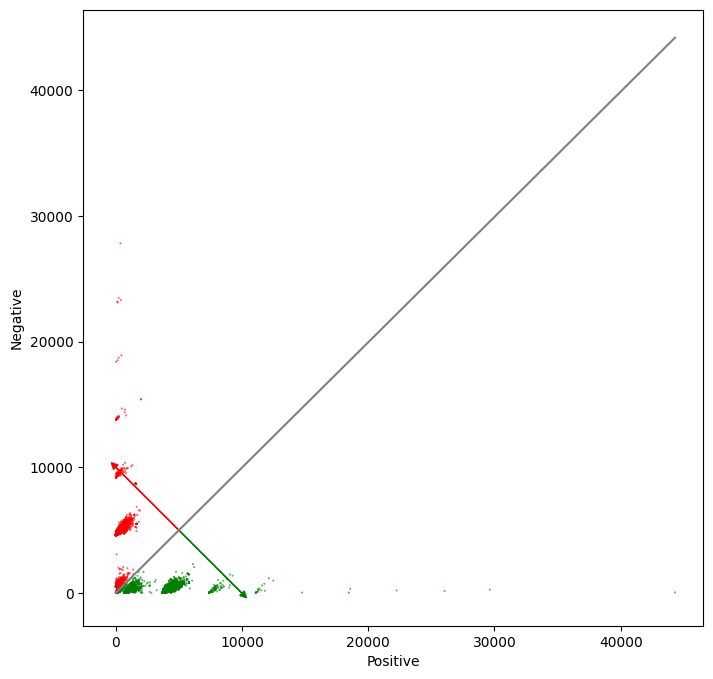

In [ ]:
# Plot the samples using columns 1 and 2 of the matrix
fig, ax = plt.subplots(figsize = (8, 8))

colors = ['red', 'green']

# Color base on the sentiment Y
ax.scatter(X[:,1], X[:,2], c=[colors[int(k)] for k in Y], s = 0.1)  # Plot a dot for each pair of words
plt.xlabel("Positive")
plt.ylabel("Negative")

# Now lets represent the logistic regression model in this chart. 
maxpos = np.max(X[:,1])

offset = 5000 # The pos value for the direction vectors origin

# Plot a gray line that divides the 2 areas.
ax.plot([0,  maxpos], [neg(theta, 0),   neg(theta, maxpos)], color = 'gray') 

# Plot a green line pointing to the positive direction
ax.arrow(offset, neg(theta, offset), offset, direction(theta, offset), head_width=500, head_length=500, fc='g', ec='g')
# Plot a red line pointing to the negative direction
ax.arrow(offset, neg(theta, offset), -offset, -direction(theta, offset), head_width=500, head_length=500, fc='r', ec='r')

plt.show()

## Week 2

### Theory

Using naive bayes to build classifier for sentiments
  * conditional probability : 
    * P(Positive|"happy") = P(Positive intersection "happy")/P("happy")
  * bayes rule:
    * P(Positive|"happy") = P("happy"|Positive)*P(Positive)/P("happy")
  * naive bayes rule is naive coz of assumption that features we are using for classification are independent

Now, steps for naive bayes classifier:
  * build the vocabulary, map it to it's positive and negative frequencies
  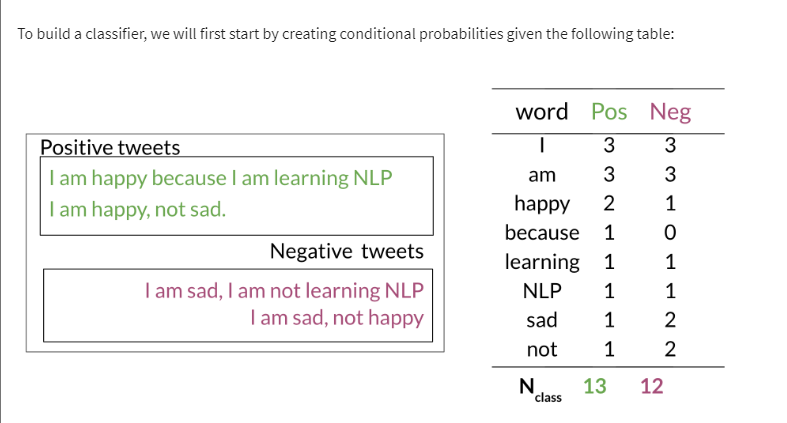
  * get total of positive counts and negative counts
  * find probability of : given a word, probability of it being negative : n(word)/n(negative) and similary, given a word, probability of it being positive : n(word)/n(positive) as:
  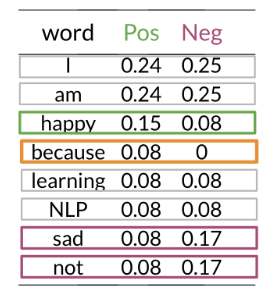
  * we will get some power words and neutral words

Naive Bayes inference rule for classification: 

  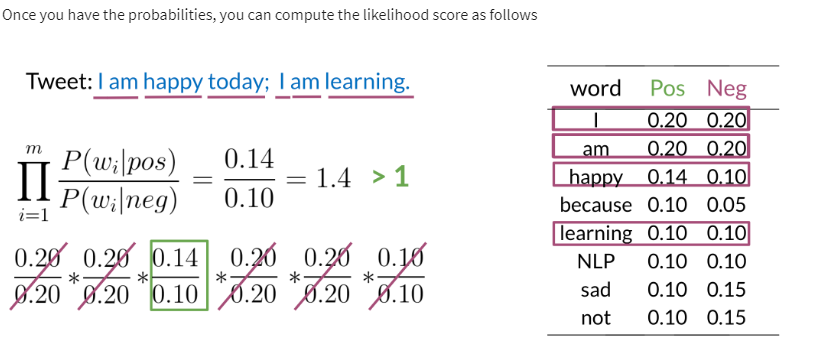
  

Laplacian Smoothing : technique to avoid probability of 0

When calculating probability of next word given a word, we do: n(word1 and word2)/n(word1)

we add 1 to each frequency of a word in positive and negative and unlike before, now we divide them by 13 + 8(no. of unique elements in vocabulary)

Due to this additional 1, words no longer have probability 0

The actual naive bayes inference :
  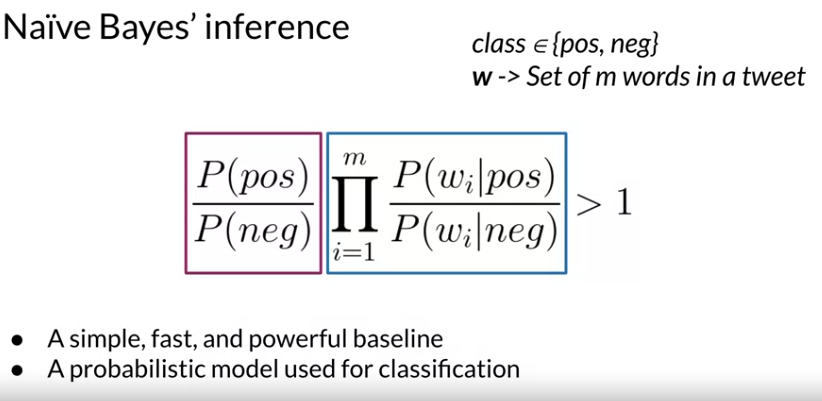

  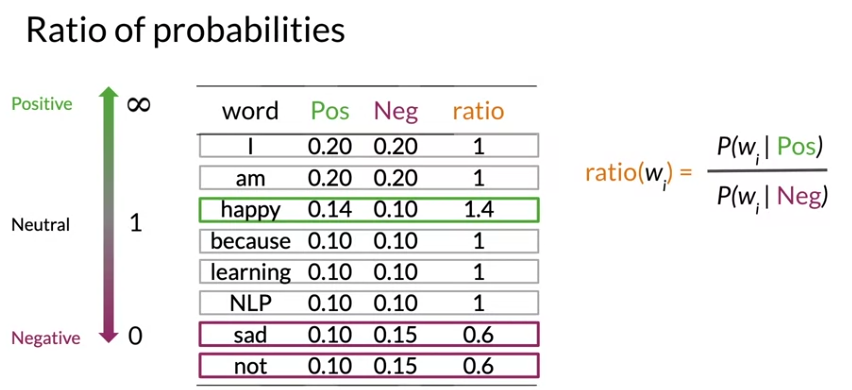

 Log Likelihood: The product of probabilities can be so small that it can lead to numbercal underflow, to avoid this , we take log of this expression

 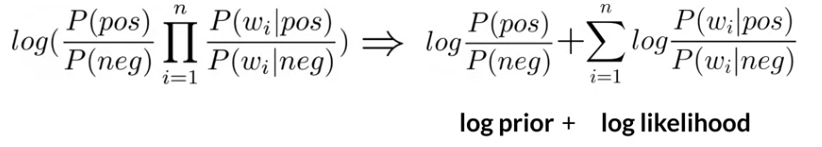
 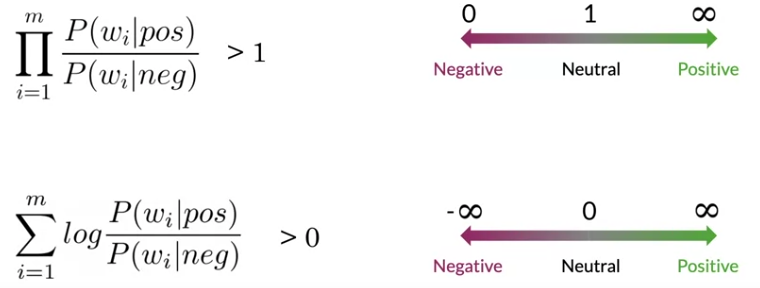

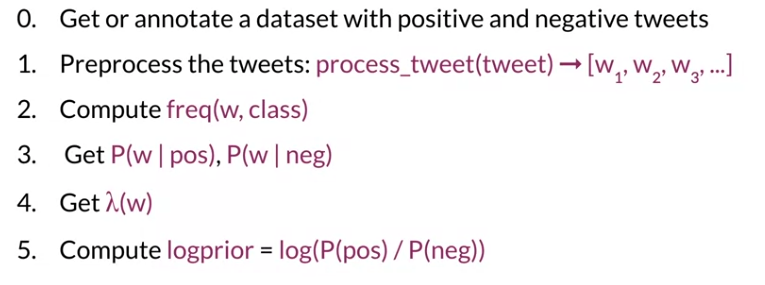

Applications of Naive Bayes:
  * author identification : instead of a classifying a word in classes of positive and negative, we could use authors as columns and run the same algorithm to predict the probability of corpora being written by an author
  * spam filtering : instead of positive and negative, we could classify our vocabulary as spam or not spam, use same algorithm and we can then find if a new message is spam or not
  * word disambiguation : suppose we don't know that in text word bank refers to river bank or the institution. For that, we could compute it by : 
  
    P(river|text)/P(money/text)

Error Analysis:
  * There can be cases when neutral words include words denoting actual sentiment. This causes it's affect on computing probability to be nill.
  * The preprocessing of texts can also alter the sentiment as exclamation mark at the end of the tweet might change the sentiment
  * word order also matters in sentiment analysis that can be ignored by naive bayes as not coming before happy is different from not coming before cold.
  * adversarial attacks: understanding sarcasm, irony and euphemisms is very hard for machines

The cause of it is the assumption of independence

### Code

#### visualizing naive bayes

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [ ]:
# since we are only visualizing in this portion, the calculations are already done and stored in a csv file
# calculations contain : positive = log(P(tweet|pos)) = sum(log(P(W|pos))),
# negative = sum(log(P(W|neg)))

data = pd.read_csv("/content/drive/MyDrive/NLP coursera util files/C1W2/bayes_features.csv")
print(data.shape)
data.head()

(8000, 3)


,positive,negative,sentiment
0,-45.763393,-63.351354,1.0
1,-105.491568,-114.204862,1.0
2,-57.028078,-67.216467,1.0
3,-10.055885,-18.589057,1.0
4,-125.749270,-138.334845,1.0


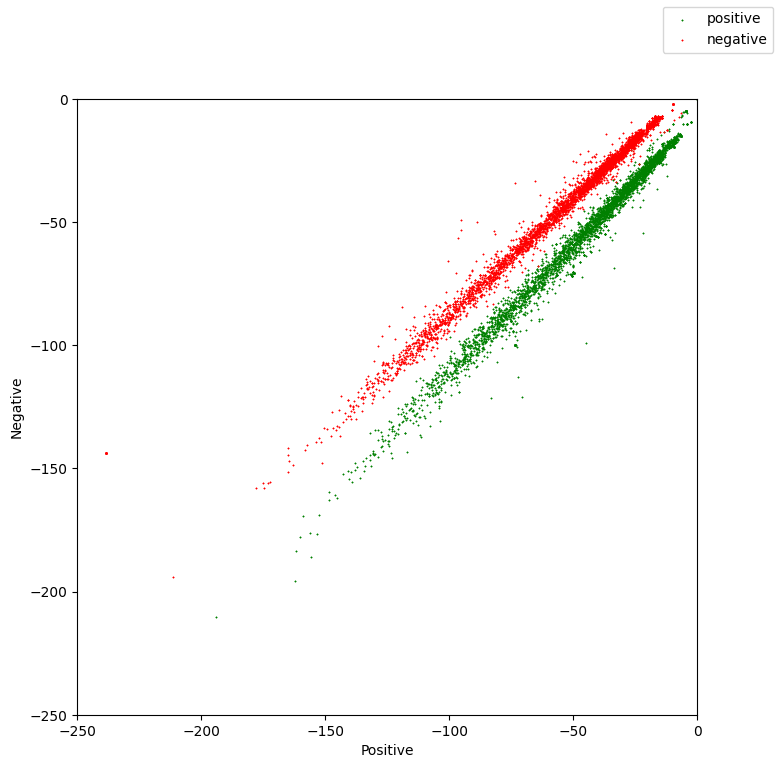

In [ ]:
fig = plt.figure(figsize = (8,8))

colors = ['red', 'green']
sentiments = ['negative', 'positive']

index = data.index

for sentiment in data.sentiment.unique():
  ix = index[data.sentiment==sentiment]
  plt.scatter(data.iloc[ix].positive, data.iloc[ix].negative, c = colors[int(sentiment)], s = 0.1, marker = "*", label = sentiments[int(sentiment)])

fig.legend()

plt.xlim(-250,0)
plt.ylim(-250,0)

plt.xlabel("Positive")
plt.ylabel("Negative")
plt.show()

In [ ]:
!cp /content/drive/MyDrive/NLP coursera util files/C1W2/utils.py

cp: target 'files/C1W2/utils.py' is not a directory


In [ ]:
from utils import confidence_ellipse

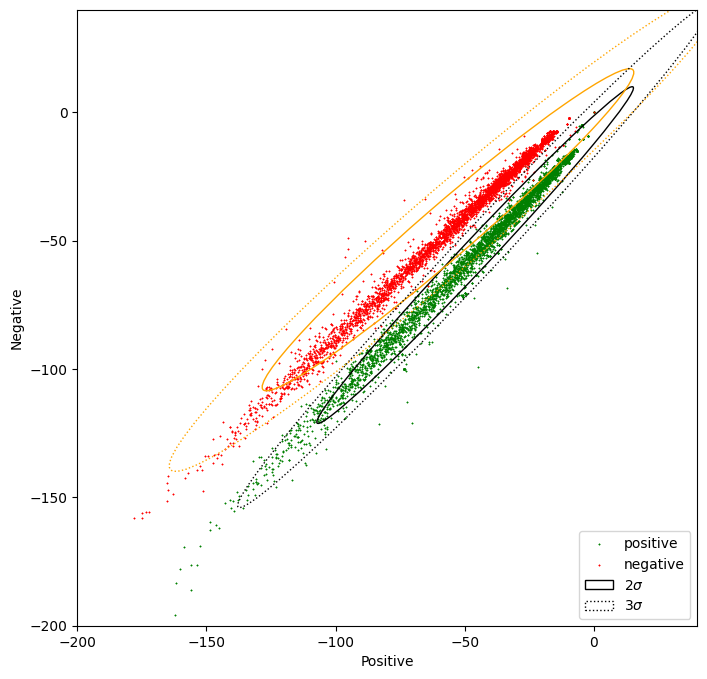

In [ ]:
# Plot the samples using columns 1 and 2 of the matrix
fig, ax = plt.subplots(figsize = (8, 8))

colors = ['red', 'green'] # Define a color palete
sentiments = ['negative', 'positive'] 
index = data.index

# Color base on sentiment
for sentiment in data.sentiment.unique():
    ix = index[data.sentiment == sentiment]
    ax.scatter(data.iloc[ix].positive, data.iloc[ix].negative, c=colors[int(sentiment)], s=0.1, marker='*', label=sentiments[int(sentiment)])

# Custom limits for this chart
plt.xlim(-200,40)  
plt.ylim(-200,40)

plt.xlabel("Positive") # x-axis label
plt.ylabel("Negative") # y-axis label

data_pos = data[data.sentiment == 1] # Filter only the positive samples
data_neg = data[data.sentiment == 0] # Filter only the negative samples

# Print confidence ellipses of 2 std
confidence_ellipse(data_pos.positive, data_pos.negative, ax, n_std=2, edgecolor='black', label=r'$2\sigma$' )
confidence_ellipse(data_neg.positive, data_neg.negative, ax, n_std=2, edgecolor='orange')

# Print confidence ellipses of 3 std
confidence_ellipse(data_pos.positive, data_pos.negative, ax, n_std=3, edgecolor='black', linestyle=':', label=r'$3\sigma$')
confidence_ellipse(data_neg.positive, data_neg.negative, ax, n_std=3, edgecolor='orange', linestyle=':')
ax.legend(loc='lower right')

plt.show()

#### Code for actual naive bayes classificatin using dataset containing corpora and their frequencies in positive and negative sentiments

In [ ]:
from nltk.corpus import stopwords, twitter_samples
import numpy as np
import pandas as pd
import nltk
import string
from nltk.tokenize import TweetTokenizer

nltk.download('twitter_samples')
nltk.download('stopwords')

# get the sets of positive and negative tweets
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

# split the data into two pieces, one for training and one for testing (validation set)
test_pos = all_positive_tweets[4000:]
train_pos = all_positive_tweets[:4000]
test_neg = all_negative_tweets[4000:]
train_neg = all_negative_tweets[:4000]

train_x = train_pos + train_neg
test_x = test_pos + test_neg

# avoid assumptions about the length of all_positive_tweets
train_y = np.append(np.ones(len(train_pos)), np.zeros(len(train_neg)))
test_y = np.append(np.ones(len(test_pos)), np.zeros(len(test_neg)))


def count_tweets(result, tweets, ys):
    '''
    Input:
        result: a dictionary that will be used to map each pair to its frequency
        tweets: a list of tweets
        ys: a list corresponding to the sentiment of each tweet (either 0 or 1)
    Output:
        result: a dictionary mapping each pair to its frequency
    '''
    ### START CODE HERE ###
    for y, tweet in zip(ys, tweets):
        for word in process_tweet(tweet):
            # define the key, which is the word and label tuple
            pair = (word,y)
            
            # if the key exists in the dictionary, increment the count
            if pair in result:
                result[pair] += 1

            # else, if the key is new, add it to the dictionary and set the count to 1
            else:
                result[pair] = 1
    ### END CODE HERE ###

    return result

# Build the freqs dictionary for later uses
freqs = count_tweets({}, train_x, train_y)

[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### Prior and Logprior

The prior probability represents the underlying probability in the target population that a tweet is positive versus negative.  In other words, if we had no specific information and blindly picked a tweet out of the population set, what is the probability that it will be positive versus that it will be negative? That is the "prior".

The prior is the ratio of the probabilities $\frac{P(D_{pos})}{P(D_{neg})}$.
We can take the log of the prior to rescale it, and we'll call this the logprior

$$\text{logprior} = log \left( \frac{P(D_{pos})}{P(D_{neg})} \right) = log \left( \frac{D_{pos}}{D_{neg}} \right)$$.

Note that $log(\frac{A}{B})$ is the same as $log(A) - log(B)$.  So the logprior can also be calculated as the difference between two logs:

$$\text{logprior} = \log (P(D_{pos})) - \log (P(D_{neg})) = \log (D_{pos}) - \log (D_{neg})\tag{3}$$

#### Positive and Negative Probability of a Word
To compute the positive probability and the negative probability for a specific word in the vocabulary, we'll use the following inputs:

- $freq_{pos}$ and $freq_{neg}$ are the frequencies of that specific word in the positive or negative class. In other words, the positive frequency of a word is the number of times the word is counted with the label of 1.
- $N_{pos}$ and $N_{neg}$ are the total number of positive and negative words for all documents (for all tweets), respectively.
- $V$ is the number of unique words in the entire set of documents, for all classes, whether positive or negative.

We'll use these to compute the positive and negative probability for a specific word using this formula:

$$ P(W_{pos}) = \frac{freq_{pos} + 1}{N_{pos} + V}\tag{4} $$
$$ P(W_{neg}) = \frac{freq_{neg} + 1}{N_{neg} + V}\tag{5} $$

In [ ]:
def train_naive_bayes(freqs, train_x, train_y):
    '''
    Input:
        freqs: dictionary from (word, label) to how often the word appears
        train_x: a list of tweets
        train_y: a list of labels correponding to the tweets (0,1)
    Output:
        logprior: the log prior. (equation 3 above)
        loglikelihood: the log likelihood of you Naive bayes equation. (equation 6 above)
    '''
    loglikelihood = {}
    logprior = 0

    ### START CODE HERE ###

    # calculate V, the number of unique words in the vocabulary
    vocab = set([pair[0] for pair in freqs.keys()])
    V = len(vocab)

    # calculate N_pos, N_neg, V_pos, V_neg
    N_pos = N_neg = 0
    for pair in freqs.keys():
        # if the label is positive (greater than zero)
        if pair[1] > 0:

            # Increment the number of positive words by the count for this (word, label) pair
            N_pos = N_pos + freqs.get(pair,0)

        # else, the label is negative
        else:

            # increment the number of negative words by the count for this (word,label) pair
            N_neg = N_neg + freqs.get(pair,0)
    
    # Calculate D, the number of documents
    D = len(train_y)

    # Calculate D_pos, the number of positive documents
    D_pos = sum(train_y)

    # Calculate D_neg, the number of negative documents
    D_neg = D-D_pos

    # Calculate logprior
    logprior = np.log(D_pos)-np.log(D_neg)
    
    # For each word in the vocabulary...
    for word in vocab:
        # get the positive and negative frequency of the word
        freq_pos = freqs.get((word,1.0),0)
        freq_neg = freqs.get((word,0.0),0)

        # calculate the probability that each word is positive, and negative
        p_w_pos = (freq_pos+1)/(N_pos+V)
        p_w_neg = (freq_neg+1)/(N_neg+V)

        # calculate the log likelihood of the word
        loglikelihood[word] = np.log(p_w_pos/p_w_neg)

    ### END CODE HERE ###

    return logprior, loglikelihood

In [ ]:
logprior, loglikelihood = train_naive_bayes(freqs, train_x, train_y)
print(logprior)
print(len(loglikelihood))

0.0
9161


In [ ]:
def naive_bayes_predict(tweet, logprior, loglikelihood):
    '''
    Input:
        tweet: a string
        logprior: a number
        loglikelihood: a dictionary of words mapping to numbers
    Output:
        p: the sum of all the logliklihoods of each word in the tweet (if found in the dictionary) + logprior (a number)

    '''
    ### START CODE HERE ###
    # process the tweet to get a list of words
    word_l = process_tweet(tweet)

    # initialize probability to zero
    p = 0

    # add the logprior
    p += logprior

    for word in word_l:

        # check if the word exists in the loglikelihood dictionary
        if word in loglikelihood:
            # add the log likelihood of that word to the probability
            p += loglikelihood[word]

    ### END CODE HERE ###

    return p

In [ ]:
my_tweet = 'She smiled.'
p = naive_bayes_predict(my_tweet, logprior, loglikelihood)
print('The expected output is', p)

The expected output is 1.557492820301094


In [ ]:
def test_naive_bayes(test_x, test_y, logprior, loglikelihood, naive_bayes_predict=naive_bayes_predict):
    """
    Input:
        test_x: A list of tweets
        test_y: the corresponding labels for the list of tweets
        logprior: the logprior
        loglikelihood: a dictionary with the loglikelihoods for each word
    Output:
        accuracy: (# of tweets classified correctly)/(total # of tweets)
    """
    accuracy = 0  # return this properly

    ### START CODE HERE ###
    y_hats = []
    for tweet in test_x:
        # if the prediction is > 0
        if naive_bayes_predict(tweet, logprior, loglikelihood) > 0:
            # the predicted class is 1
            y_hat_i = 1
        else:
            # otherwise the predicted class is 0
            y_hat_i = 0

        # append the predicted class to the list y_hats
        y_hats.append(y_hat_i)

    # error is the average of the absolute values of the differences between y_hats and test_y
    error = sum(y_hats!=test_y)/len(test_y)

    # Accuracy is 1 minus the error
    accuracy = 1-error

    ### END CODE HERE ###

    return accuracy

In [ ]:
print("Naive Bayes accuracy = %0.4f" %
      (test_naive_bayes(test_x, test_y, logprior, loglikelihood)))

Naive Bayes accuracy = 0.9955


## Week 3

### Theory

representing text documents as a vector
  * vector space models : help us identify whether the pair of questions have similar meaning even if they do not share the same words.
  * advantages :
    * capture dependencies between words
  * applications

Fundamental concept : "You shall know a word by the company it keeps"

co-occurence -> vector representation
1. Word by Word design : co-occurence is the number of times they occur together within a certain distance k
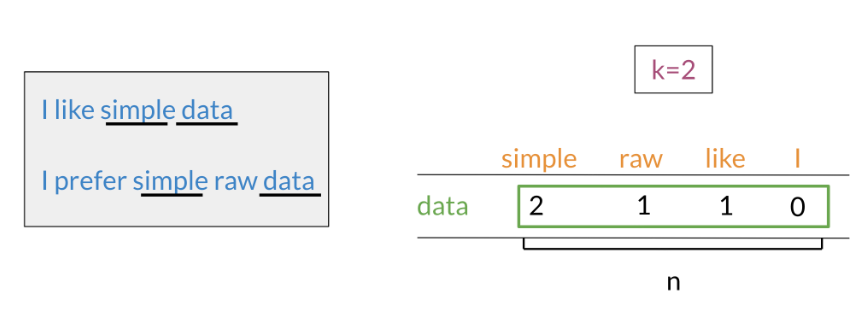
2. Word by Document design : number of times a word occurs within a certain category
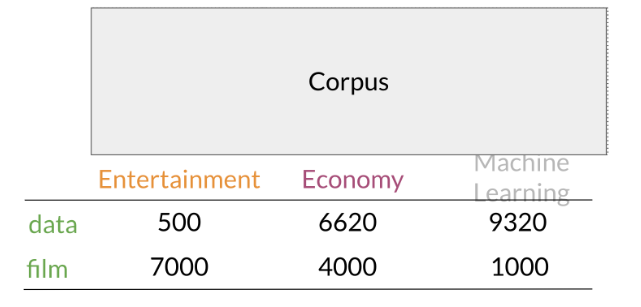

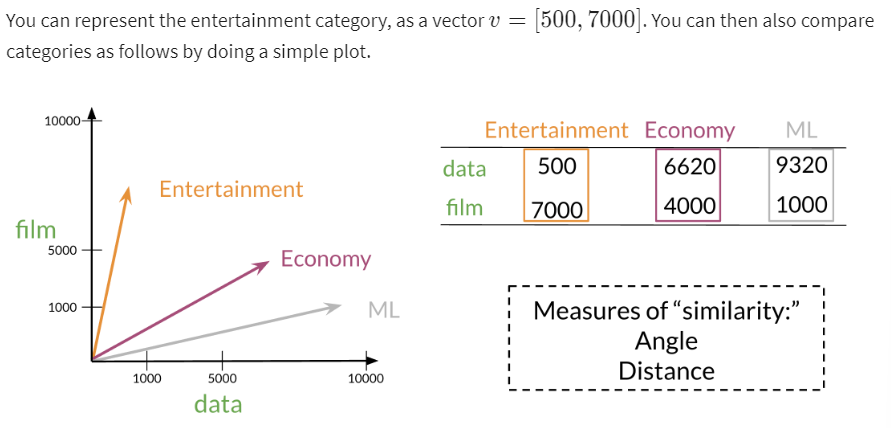

#### Euclidean Distance

It is the length of straight line that connects two vectors

It is a metric to find distance between 2 points which is square root of horizontal distance squared + vertical distance squared
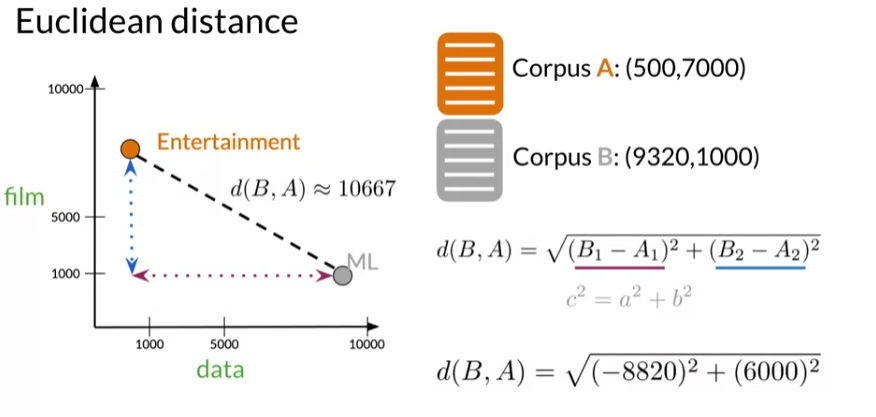

for n dimensional vector space the formula is not much different

d(v,w) = sqrt(sum((vi - wi)^2))    ~    norm of (v-w) in numpy

In [ ]:
import numpy as np
v = np.array([1,6,8])
w = np.array([0,4,6])
    # linear algorithms
d = np.linalg.norm(v-w)

print("The Euclidean distance between v and w is: ", d)

The Euclidean distance between v and w is:  3.0


#### Cosine Similarity

another similarity function

Problem with Euclidean Distance:

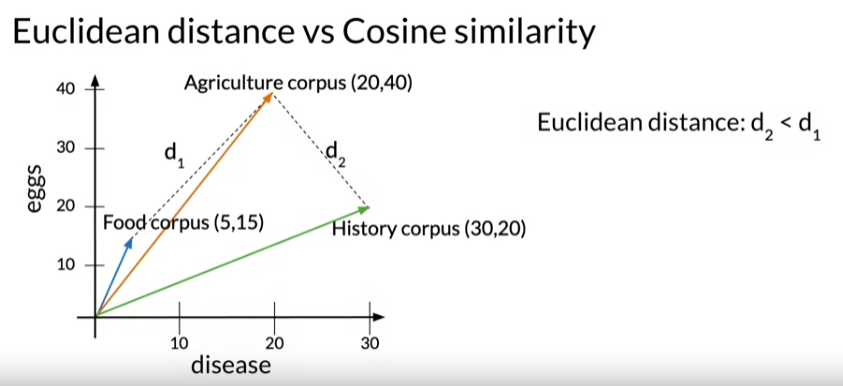

Due to lack of data in food corpus, distance d2<d1 which suggests that Agriculture and History corpora are more similar than Agriculture and Food corpora

Hence, we use inner angle to determine similarity which is independent of corpora sizes

Cosine similarity uses cos function

cos(0) = 1 and cos(90) = 0 => which accurately represents similarity parameter

Vector norm of a vector = square root of the sum of its elements squared

> norm of v = sqrt(sum(vi^2))

dot product is a scalar product of elements of the vector

> dot product = v.w = sum(vi.wi)

We know :
> a.b = |a||b|cosQ
So,
>cosQ = a.b/(|a||b|)

cosine similarity ranges from 1 to -1
(idk why they say it ranges from 0 to 1)

In [ ]:
# cosine similarity calculation

import numpy as np

a = np.array([1,0,-1,6,8])
b = np.array([0,11,4,7,6])

cosine_similarity = np.dot(a,b)/(np.linalg.norm(a)*np.linalg.norm(b))
print("Cosine similarity of the two vectors is: ", cosine_similarity)

Cosine similarity of the two vectors is:  0.5715074263607117


#### Manipulating Word Embeddings

**word_embeddings** is a dictionary. Each word is the key to the entry, and the value is its corresponding vector presentation. Remember that square brackets allow access to any entry if the key exists. 

understanding the data is one of the most critical steps in Data Science. Word embeddings are the result of machine learning processes and will be part of the input for further processes. These word embedding needs to be validated or at least understood because the performance of the derived model will strongly depend on its quality.

Word embeddings are multidimensional arrays, usually with hundreds of attributes that pose a challenge for its interpretation. 

In this notebook, we will visually inspect the word embedding of some words using a pair of attributes. Raw attributes are not the best option for the creation of such charts but will allow us to illustrate the mechanical part in Python. 

In the next cell, we make a beautiful plot for the word embeddings of some words. Even if plotting the dots gives an idea of the words, the arrow representations help to visualize the vector's alignment as well.

honestly I have no idea why we are doing this, ig, just vector manipulations in general

#### PCA
dimensionality reduction algorithm

The thing is words have their embeddings in the form of dictionary, these embeddings are in the form of vectors. Now, plotting them and to visualize higher order vector space is quite difficult. Hence PCA can be used to reduce them from higher dimensions for better visualization

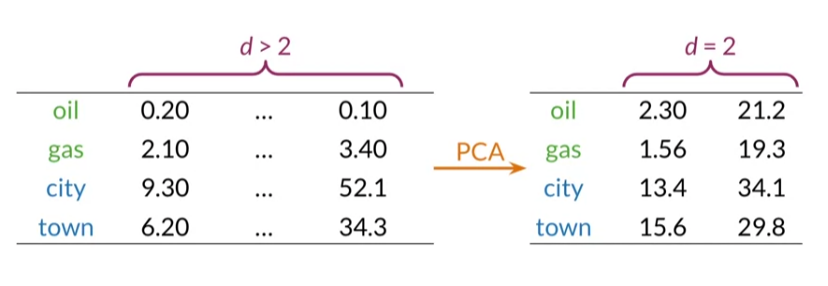

PCA : algorithm to reduce dimensions while retaining as much info as possible

Eigenvector : Uncorrelated features for your data

Eigenvalue : the amount of information retained by each feature

steps:
  * mean normalize data
  * get covariance matrix
  * perform singular value decomposition
    
The steps to compute PCA are as follows:

1. Mean normalize the data
2. Compute the covariance matrix of your data ($\Sigma$). 
3. Compute the eigenvectors and the eigenvalues of your covariance matrix
4. Multiply the first K eigenvectors by your normalized data. The transformation should look something as follows:

##### PCA using sklearn

In [ ]:
import pandas as pd
import random
import numpy as np
from sklearn.decomposition import PCA

np.random.seed(1)
x = np.random.uniform(1,2,1000)
y = x.copy()*2
z = x.copy()*3

data = pd.DataFrame({
    'x':x,
    'y':y,
    'z':z
})

pca = PCA(n_components=2)
pcaTr = pca.fit(data)

rotatedData = pcaTr.transform(data)
dataPCA = pd.DataFrame(data = rotatedData, columns = ['PC1', 'PC2'])

In [ ]:
dataPCA.head()

,PC1,PC2
0,0.312737,-1.509287e-16
1,-0.822117,6.654566e-16
2,1.872663,-5.660073e-16
3,0.741866,-2.481572e-16
4,1.323981,-4.281203e-16


In [ ]:
print('Eigenvectors or principal component:')
print(pcaTr.components_)
print()
print('Eigenvalues or explained variance')
print(pcaTr.explained_variance_)

Eigenvectors or principal component:
[[-0.26726124 -0.53452248 -0.80178373]
 [ 0.35856858  0.71713717 -0.5976143 ]]

Eigenvalues or explained variance
[1.16525661e+00 9.35623817e-32]


##### PCA using algorithm

In [ ]:
import numpy

def compute_pca(X, n_components=2):
    """
    Input:
        X: of dimension (m,n) where each row corresponds to a word vector
        n_components: Number of components you want to keep.
    Output:
        X_reduced: data transformed in 2 dims/columns + regenerated original data
    pass in: data as 2D NumPy array
    """

    ### START CODE HERE ###
    # mean center the data
    X_demeaned = (X - np.mean(X, axis = 0)).T

    # calculate the covariance matrix
    covariance_matrix = numpy.cov(X_demeaned)

    # calculate eigenvectors & eigenvalues of the covariance matrix
    eigen_vals, eigen_vecs = np.linalg.eigh(covariance_matrix, UPLO = 'L')

    # sort eigenvalue in increasing order (get the indices from the sort)
    idx_sorted = np.argsort(eigen_vals)
    
    # reverse the order so that it's from highest to lowest.
    idx_sorted_decreasing = idx_sorted[::-1]

    # sort the eigen values by idx_sorted_decreasing
    eigen_vals_sorted = eigen_vals[idx_sorted_decreasing]

    # sort eigenvectors using the idx_sorted_decreasing indices
    eigen_vecs_sorted = eigen_vecs[:, idx_sorted_decreasing]

    # select the first n eigenvectors (n is desired dimension
    # of rescaled data array, or n_components)
    eigen_vecs_subset = eigen_vecs_sorted[:, :n_components]

    # transform the data by multiplying the transpose of the eigenvectors with the transpose of the de-meaned data
    # Then take the transpose of that product.
    X_reduced = np.dot(X_demeaned.T, eigen_vecs_subset)

    ### END CODE HERE ###

    return X_reduced

In [ ]:
compute_pca(data)

array([[ 3.12737433e-01,  2.39292076e-19],
       [-8.22116564e-01, -1.03694368e-16],
       [ 1.87266295e+00, -1.45732734e-16],
       ...,
       [-6.29316863e-01, -1.12488271e-16],
       [ 6.53433288e-01, -7.69272906e-17],
       [-1.02473769e+00, -5.97931997e-17]])

In natural language processing, we represent each word as a vector consisting of numbers. The vector encodes the meaning of the word. These numbers (or weights) for each word are learned using various machine learning models, which we will explore in more detail later in this specialization. Rather than make you code the machine learning models from scratch, we will show you how to use them. In the real world, you can always load the trained word vectors, and you will almost never have to train them from scratch

**Finding country of each Capital**

In manipulating word embeddings, we learnt about how we can find the relationship between words and use it to find words related to others

eg: Athens is to Greece as Bangkok is to __?

We can use cosine similarity to find these answers. Only thing required is good word embeddings

steps:
  * take input city1, country1, city2, word_embeddings
  * compute the expected vector as:
    * vec = word_embeddings[country1]-word_embeddings[city1] + word_embeddings[city2]
  * next, find cosine similarity between all word embeddings and vec and find the maximum one
  * return that word with maximum similarity

## Week 4

###Theory

* building first simple machine translation system and we will make use of locality sensitive hashing to improve the performance of nearest neighbor search
* document search

Machine Translation will be based on the work we previously did with word embeddings

We find a relation between words and use that relation to find translation

rel = cosine_similarity(word_embeddigs[country],word_embeddings[city])
desired city = max(cosine_similarity(word_embeddings[given_country]+vec, word_embeddings))


#### Transforming Word vectors

Instead of using cosine similarity, we will find our own transformation matrix : R

> XR ~ Y

Where X is a vector of word embeddings of english words and Y is a vector of word embeddings of french words

Now, inorder to find best R:
* initialize R
* in a loop:
  * Loss = ||XR - Y||f &emsp;//f is in subscript which means frobenius norm
  * g = d(Loss)/dR &emsp;//gradiend
  * R = R-alpha*g &emsp;//update R

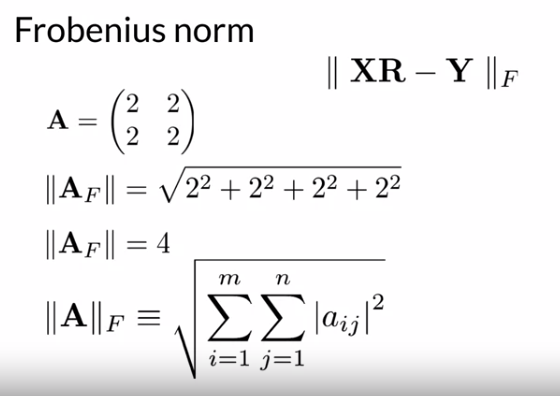

Why use nlp when we can map each word in english to it's corresponding french word?

Because we can find the transformation matrix on a subset of data and then use it for actual translation

#### K Nearest Neighbors

The obtained Y matrix containing word embeddings might not actually be present in the french word embeddings

Hence, we need an algo to find it's nearest possible value

##### Locality Sensitive Hashing

Hashing method that cares very deeply about assigning items based on where they're located in vector space

It is the key method to reduce the computational cost of finding Neighbors in high dimensional spaces

The sign of the dot product indicates the direction if 0 => perpendicular, if +ve => same side of the plane, if -ve => opposite side of the plane

Using this info we can get a hash value for our data in our vector space.

In order to divide our vector space into manageable regions, we will use more than one plane.

for each plane, we will get signals either positive or negative or zero

We can combine each of their generated values to get the hash value

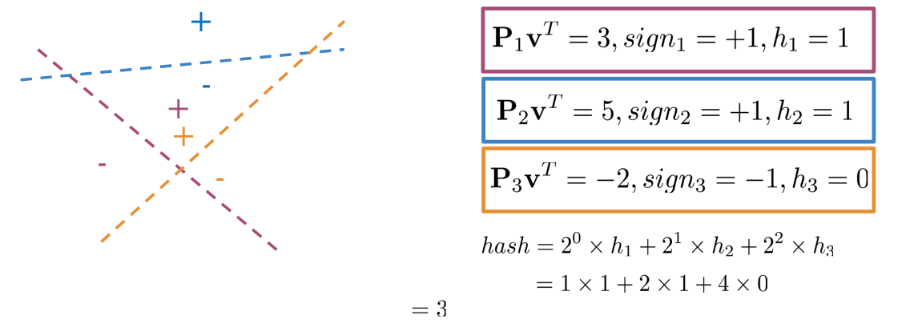

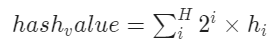

In [ ]:
## Basic hasing

def basic_hash_table(value_l, n_buckets):
    
    def hash_function(value, n_buckets):
        return int(value) % n_buckets
    
    hash_table = {i:[] for i in range(n_buckets)} # Initialize all the buckets in the hash table as empty lists

    for value in value_l:
        hash_value = hash_function(value,n_buckets) # Get the hash key for the given value
        hash_table[hash_value].append(value) # Add the element to the corresponding bucket
    
    return hash_table

value_l = [100, 10, 14, 17, 97] # Set of values to hash
hash_table_example = basic_hash_table(value_l, n_buckets=10)
print(hash_table_example)

{0: [100, 10], 1: [], 2: [], 3: [], 4: [14], 5: [], 6: [], 7: [17, 97], 8: [], 9: []}


In [ ]:
## Multiplanes hashing
import numpy as np

def side_of_plane(P, v):
    dotproduct = np.dot(P, v.T) # Get the dot product P * v'
    sign_of_dot_product = np.sign(dotproduct) # The sign of the elements of the dotproduct matrix //returns a numpy array
    sign_of_dot_product_scalar = sign_of_dot_product.item() # The value of the first item
    return sign_of_dot_product_scalar

In [ ]:
P1 = np.array([[1, 1]])   # First plane 2D
P2 = np.array([[-1, 1]])  # Second plane 2D
P3 = np.array([[-1, -1]]) # Third plane 2D
P_l = [P1, P2, P3]  # List of arrays. It is the multi plane

# Vector to search
v = np.array([[2, 2]])

In [ ]:
def hash_multi_plane(P_l, v):
    hash_value = 0
    for i, P in enumerate(P_l):
        sign = side_of_plane(P,v)
        hash_i = 1 if sign >=0 else 0
        hash_value += 2**i * hash_i
    return hash_value

In [ ]:
hash_multi_plane(P_l, v) # Find the number of the plane that containes this value

3

#### Document Searching

I love learning! = [?,?,?]

The above document's vector space can be calculated by summing the vector spaces of the words

dict = {
  "I" : [1,0,1],
  "love" : [-1,0,1],
  "learning" : [1,0,1]
}

hence, I love learning ~ [1, 0, 3]

Now, document search to search for similar statements, queries and what not can be done through k-nn

### Machine Translation

[github](https://github.com/Sahil-Chhabra-09/Machine-Translation-English-to-French-)